In [2]:
# First two code blocks are the same as the supervised version
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris_raw = datasets.load_iris()
iris = pd.DataFrame(iris_raw.data, columns = iris_raw.feature_names)

iris = pd.concat([iris, pd.DataFrame(iris_raw.target)], axis = 1)
iris.columns.values[4] = 'tgt_no'

tgt_dict = dict(zip(np.arange(0, len(iris_raw.target_names)), iris_raw.target_names))

iris['species'] = iris['tgt_no'].map(tgt_dict)

iris = iris.drop('tgt_no', axis = 1)

iris.head()

# split data into test group with (speal + petal) * (length + width)
x_iris = iris.drop('species', axis = 1)
y_iris = iris['species']
xtrain, xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state = 1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


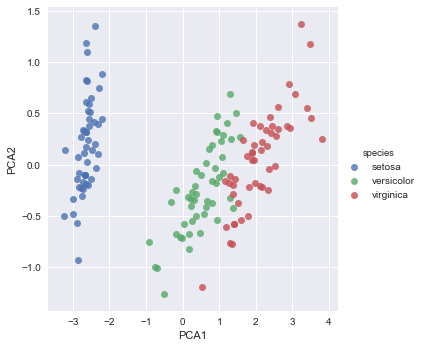

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

model = PCA(n_components = 2)
model.fit(x_iris)
x_2d = model.transform(x_iris)

iris['PCA1'] = x_2d[:, 0]
iris['PCA2'] = x_2d[:, 1]
sns.lmplot('PCA1', 'PCA2', hue = 'species', data = iris, fit_reg = False)
plt.show()

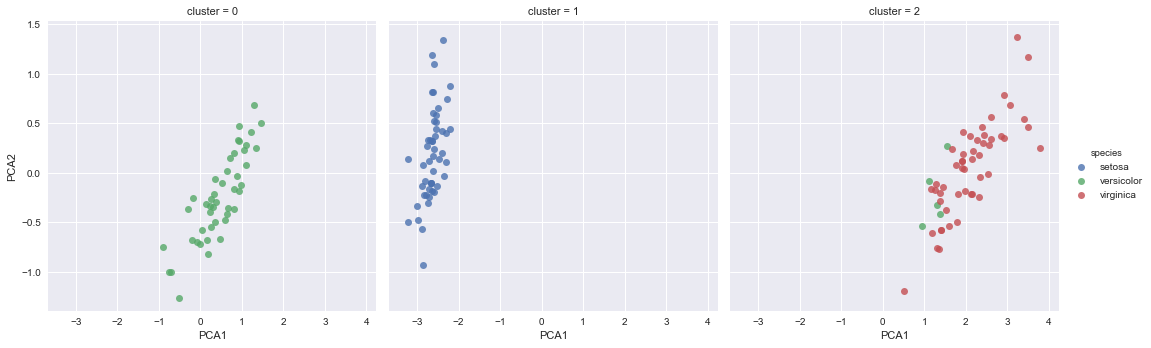

In [18]:
from sklearn.mixture import GaussianMixture
import seaborn as sns; sns.set()
model = GaussianMixture(n_components = 3,
           covariance_type = 'full')
model.fit(x_iris)
y_gmm = model.predict(x_iris)

iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=iris, hue = 'species', col='cluster', fit_reg = False)
plt.show()